in this notebook we:
* investigate the model (s predictions) for stage4a further

In [1]:
from pathlib import Path
import json
import logging

import numpy as np
import pandas as pd

from fastai.vision import *

import os

# import wandb
# from wandb.fastai import WandbCallback

from IPython.display import Image, display

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# import configparser

# from functions_wandb_no_rescale import *

import random

In [2]:
HOME_FOLDER_OF_REPO = Path("/home/jupyter/repo_gabon_wildlife_training/")
# INSPECTED_MODEL_WEIGHTS = HOME_FOLDER_OF_REPO / "best_models/stage2a-5epochs-384_512-rescaled.pth"

#### Load predictions from the model on validation set

In [3]:
preds = torch.load(HOME_FOLDER_OF_REPO / "training/preds-stage4a-5epochs-576_768-rescaled.pt")

In [4]:
print(f"preds[0].shape = {preds[0].shape}")
print(f"preds[1].shape = {preds[1].shape}")
print(f"preds[2].shape = {preds[2].shape}")

preds[0].shape = torch.Size([43628, 28])
preds[1].shape = torch.Size([43628])
preds[2].shape = torch.Size([43628])


#### load Classes

In [7]:
classes = sorted(['Human', 'Blank', 'Elephant_African', 'Hog_Red_River', 'Buffalo_African', 'Leopard_African', 'Monkey',
       'Duiker_Red', 'Civet_African_Palm', 'Squirrel', 'Duiker_Blue', 'Bird', 'Mongoose_Black_Footed', 'Rodent',
       'Duiker_Yellow_Backed', 'Genet', 'Chimpanzee', 'Gorilla', 'Mongoose', 'Porcupine_Brush_Tailed', 'Pangolin',
       'Mandrillus', 'Chevrotain_Water', 'Cat_Golden', 'Rat_Giant', 'Guineafowl_Crested', 'Guineafowl_Black',
       'Rail_Nkulengu'])
classes

['Bird',
 'Blank',
 'Buffalo_African',
 'Cat_Golden',
 'Chevrotain_Water',
 'Chimpanzee',
 'Civet_African_Palm',
 'Duiker_Blue',
 'Duiker_Red',
 'Duiker_Yellow_Backed',
 'Elephant_African',
 'Genet',
 'Gorilla',
 'Guineafowl_Black',
 'Guineafowl_Crested',
 'Hog_Red_River',
 'Human',
 'Leopard_African',
 'Mandrillus',
 'Mongoose',
 'Mongoose_Black_Footed',
 'Monkey',
 'Pangolin',
 'Porcupine_Brush_Tailed',
 'Rail_Nkulengu',
 'Rat_Giant',
 'Rodent',
 'Squirrel']

#### load images list

In [8]:
images_list = np.load(HOME_FOLDER_OF_REPO / "training/images_list-stage4a-5epochs-576_768-rescaled.pt.npy")

In [9]:
images_list

array(['/data/Gabon_trainingData/1039759.jpg', '/data/Gabon_trainingData/1195784.jpg',
       '/data/Gabon_trainingData/0880576.jpg', '/data/Gabon_trainingData/1194852.jpg', ...,
       '/data/Gabon_trainingData/1186961.jpg', '/data/Gabon_trainingData/1203146.jpg',
       '/data/Gabon_trainingData/1227618.jpg', '/data/Gabon_trainingData/1229185.jpg'], dtype='<U37')

img: /data/Gabon_trainingData/0742035.jpg
label: Elephant_African
pred: Elephant_African


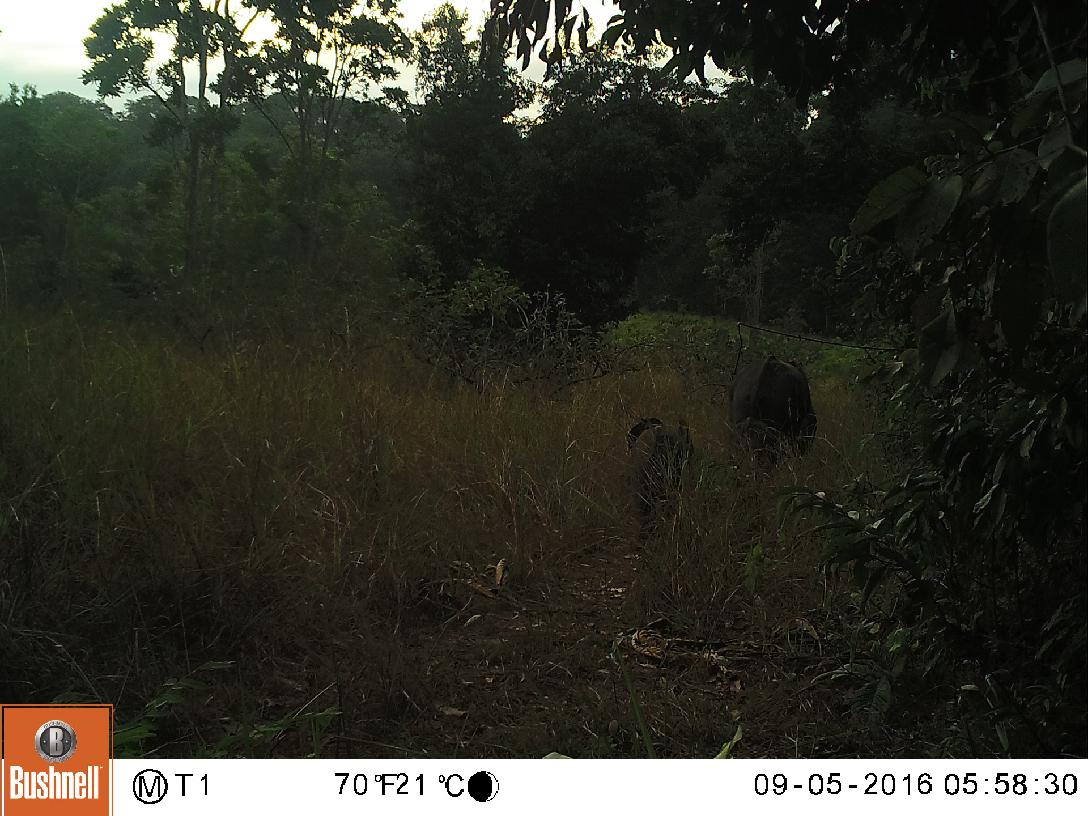

In [21]:
i = 10056
print(f"img: {images_list[i]}\nlabel: {classes[preds[1][i]]}\npred: {classes[preds[0][i].argmax()]}")
Image(images_list[i])

In [14]:
# cp /data_rescaled/resc_1530368.jpg ./

# Build df with predictions

In [22]:
df_preds = pd.DataFrame(preds[0].numpy(), columns=classes)

In [23]:
# df_preds["pred"] = df_preds.idxmax(axis=1)

In [24]:
df_preds["label"] = pd.Series(preds[1]).apply(lambda x: classes[x])

In [25]:
df_preds["img"] = images_list

In [26]:
df_preds["uniqueName"] = df_preds.img.str.extract("\/(\d*\.jpg)$", expand=True)

In [27]:
df_preds.head()

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Monkey,Pangolin,Porcupine_Brush_Tailed,Rail_Nkulengu,Rat_Giant,Rodent,Squirrel,label,img,uniqueName
0,3.570265e-05,0.001445,2.180603e-04,9.789845e-06,1.021979e-05,1.123897e-05,1.040487e-05,4.403269e-04,4.605485e-05,5.058151e-05,...,0.000146,1.127984e-04,6.038430e-05,6.417665e-05,3.078030e-04,8.832035e-05,1.864563e-05,Human,/data/Gabon_trainingData/1039759.jpg,1039759.jpg
1,3.359222e-06,0.000893,2.089690e-05,2.785994e-07,1.902536e-05,2.143928e-06,3.144651e-06,1.606906e-05,2.828091e-06,6.575648e-07,...,0.000001,7.325554e-06,9.984340e-01,1.082130e-05,2.097926e-04,1.849560e-04,2.622566e-05,Porcupine_Brush_Tailed,/data/Gabon_trainingData/1195784.jpg,1195784.jpg
2,1.173622e-07,0.998352,8.825286e-07,1.125437e-07,7.130751e-07,3.140708e-07,1.095479e-07,3.303264e-07,7.548314e-07,1.651983e-07,...,0.000005,2.872253e-07,2.115404e-07,4.875761e-07,1.106805e-07,7.919858e-07,2.676656e-08,Blank,/data/Gabon_trainingData/0880576.jpg,0880576.jpg
3,1.604006e-03,0.850026,9.273610e-03,1.160529e-04,1.545879e-04,1.047468e-03,7.212290e-05,8.633371e-02,6.769311e-04,1.903582e-05,...,0.002172,2.480773e-04,9.694800e-05,1.940562e-03,4.952705e-05,2.812913e-04,4.189791e-03,Monkey,/data/Gabon_trainingData/1194852.jpg,1194852.jpg
4,3.992095e-04,0.000073,1.489591e-04,3.351047e-05,4.849581e-05,1.795067e-04,1.804623e-05,9.280165e-01,5.082623e-04,1.021940e-05,...,0.060248,2.112286e-05,1.389015e-05,1.295873e-05,1.867652e-05,4.595548e-05,5.552495e-05,Hog_Red_River,/data/Gabon_trainingData/1201480.jpg,1201480.jpg


### top3

In [28]:
df_preds_only = pd.DataFrame(preds[0].numpy(), columns=classes)
ranks = df_preds_only.rank(axis=1,method='dense', ascending=False).astype(int)

df_preds["pred_1"] = pd.Series(ranks.where(ranks==1).notnull().values.nonzero()[1]).apply(lambda x: classes[x])
df_preds["pred_2"] = pd.Series(ranks.where(ranks==2).notnull().values.nonzero()[1]).apply(lambda x: classes[x])
df_preds["pred_3"] = pd.Series(ranks.where(ranks==3).notnull().values.nonzero()[1]).apply(lambda x: classes[x])

df_preds["score_1"] = df_preds.apply(lambda x: x[x.pred_1], axis=1)
df_preds["score_2"] = df_preds.apply(lambda x: x[x.pred_2], axis=1)
df_preds["score_3"] = df_preds.apply(lambda x: x[x.pred_3], axis=1)

In [29]:
df_preds.head()

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Squirrel,label,img,uniqueName,pred_1,pred_2,pred_3,score_1,score_2,score_3
0,3.570265e-05,0.001445,2.180603e-04,9.789845e-06,1.021979e-05,1.123897e-05,1.040487e-05,4.403269e-04,4.605485e-05,5.058151e-05,...,1.864563e-05,Human,/data/Gabon_trainingData/1039759.jpg,1039759.jpg,Human,Hog_Red_River,Blank,0.994561,0.001780,0.001445
1,3.359222e-06,0.000893,2.089690e-05,2.785994e-07,1.902536e-05,2.143928e-06,3.144651e-06,1.606906e-05,2.828091e-06,6.575648e-07,...,2.622566e-05,Porcupine_Brush_Tailed,/data/Gabon_trainingData/1195784.jpg,1195784.jpg,Porcupine_Brush_Tailed,Blank,Rat_Giant,0.998434,0.000893,0.000210
2,1.173622e-07,0.998352,8.825286e-07,1.125437e-07,7.130751e-07,3.140708e-07,1.095479e-07,3.303264e-07,7.548314e-07,1.651983e-07,...,2.676656e-08,Blank,/data/Gabon_trainingData/0880576.jpg,0880576.jpg,Blank,Human,Elephant_African,0.998352,0.001000,0.000634
3,1.604006e-03,0.850026,9.273610e-03,1.160529e-04,1.545879e-04,1.047468e-03,7.212290e-05,8.633371e-02,6.769311e-04,1.903582e-05,...,4.189791e-03,Monkey,/data/Gabon_trainingData/1194852.jpg,1194852.jpg,Blank,Duiker_Blue,Elephant_African,0.850026,0.086334,0.031094
4,3.992095e-04,0.000073,1.489591e-04,3.351047e-05,4.849581e-05,1.795067e-04,1.804623e-05,9.280165e-01,5.082623e-04,1.021940e-05,...,5.552495e-05,Hog_Red_River,/data/Gabon_trainingData/1201480.jpg,1201480.jpg,Duiker_Blue,Monkey,Hog_Red_River,0.928016,0.060248,0.004929


In [30]:
in_top3 = ((df_preds.label == df_preds.pred_1) |
           (df_preds.label == df_preds.pred_2) |
           (df_preds.label == df_preds.pred_3)).sum()

In [31]:
print(f"top3_accuracy = {round(100 * in_top3 / len(df_preds), 2)}%") 

top3_accuracy = 92.15%


In [32]:
in_top2 = ((df_preds.label == df_preds.pred_1) |
           (df_preds.label == df_preds.pred_2)).sum()

In [33]:
print(f"top2_accuracy = {round(100 * in_top2 / len(df_preds), 2)}%") 

top2_accuracy = 88.97%


In [34]:
in_top1 = (df_preds.label == df_preds.pred_1).sum()

In [35]:
print(f"top1_accuracy = {round(100 * in_top1 / len(df_preds), 2)}%") 

top1_accuracy = 80.49%


## Mandrillus classified as Monkey

In [36]:
mandrillus_as_monkey = df_preds[(df_preds.label == "Mandrillus") & (df_preds.pred_1 == "Monkey")]
print(f"There are {len(mandrillus_as_monkey)} mandrillus_as_monkey")
mandrillus_as_monkey.pred_2.value_counts()

There are 877 mandrillus_as_monkey


Mandrillus                679
Duiker_Blue                62
Chimpanzee                 56
Duiker_Red                 21
Gorilla                    13
Human                      11
Blank                      10
Bird                       10
Elephant_African            5
Squirrel                    5
Hog_Red_River               2
Mongoose                    1
Cat_Golden                  1
Porcupine_Brush_Tailed      1
Name: pred_2, dtype: int64

## Hog classified as Duiker Red

In [37]:
hog_as_duiker_red = df_preds[(df_preds.label == "Hog_Red_River") & (df_preds.pred_1 == "Duiker_Red")]
print(f"There are {len(hog_as_duiker_red)} hog_as_duiker_red")
hog_as_duiker_red.pred_2.value_counts()

There are 194 hog_as_duiker_red


Hog_Red_River           152
Duiker_Blue              15
Blank                    14
Human                     4
Duiker_Yellow_Backed      2
Bird                      2
Guineafowl_Black          2
Mandrillus                1
Rat_Giant                 1
Buffalo_African           1
Name: pred_2, dtype: int64

## Mandrillus classified as Duiker Blue

In [38]:
mandrillus_as_duiker_blue = df_preds[(df_preds.label == "Mandrillus") & (df_preds.pred_1 == "Duiker_Blue")]
print(f"There are {len(mandrillus_as_duiker_blue)} mandrillus_as_duiker_blue")
mandrillus_as_duiker_blue.pred_2.value_counts()

There are 168 mandrillus_as_duiker_blue


Monkey              51
Mandrillus          38
Duiker_Red          28
Bird                15
Squirrel            11
Hog_Red_River        8
Elephant_African     7
Guineafowl_Black     6
Chevrotain_Water     2
Chimpanzee           1
Human                1
Name: pred_2, dtype: int64

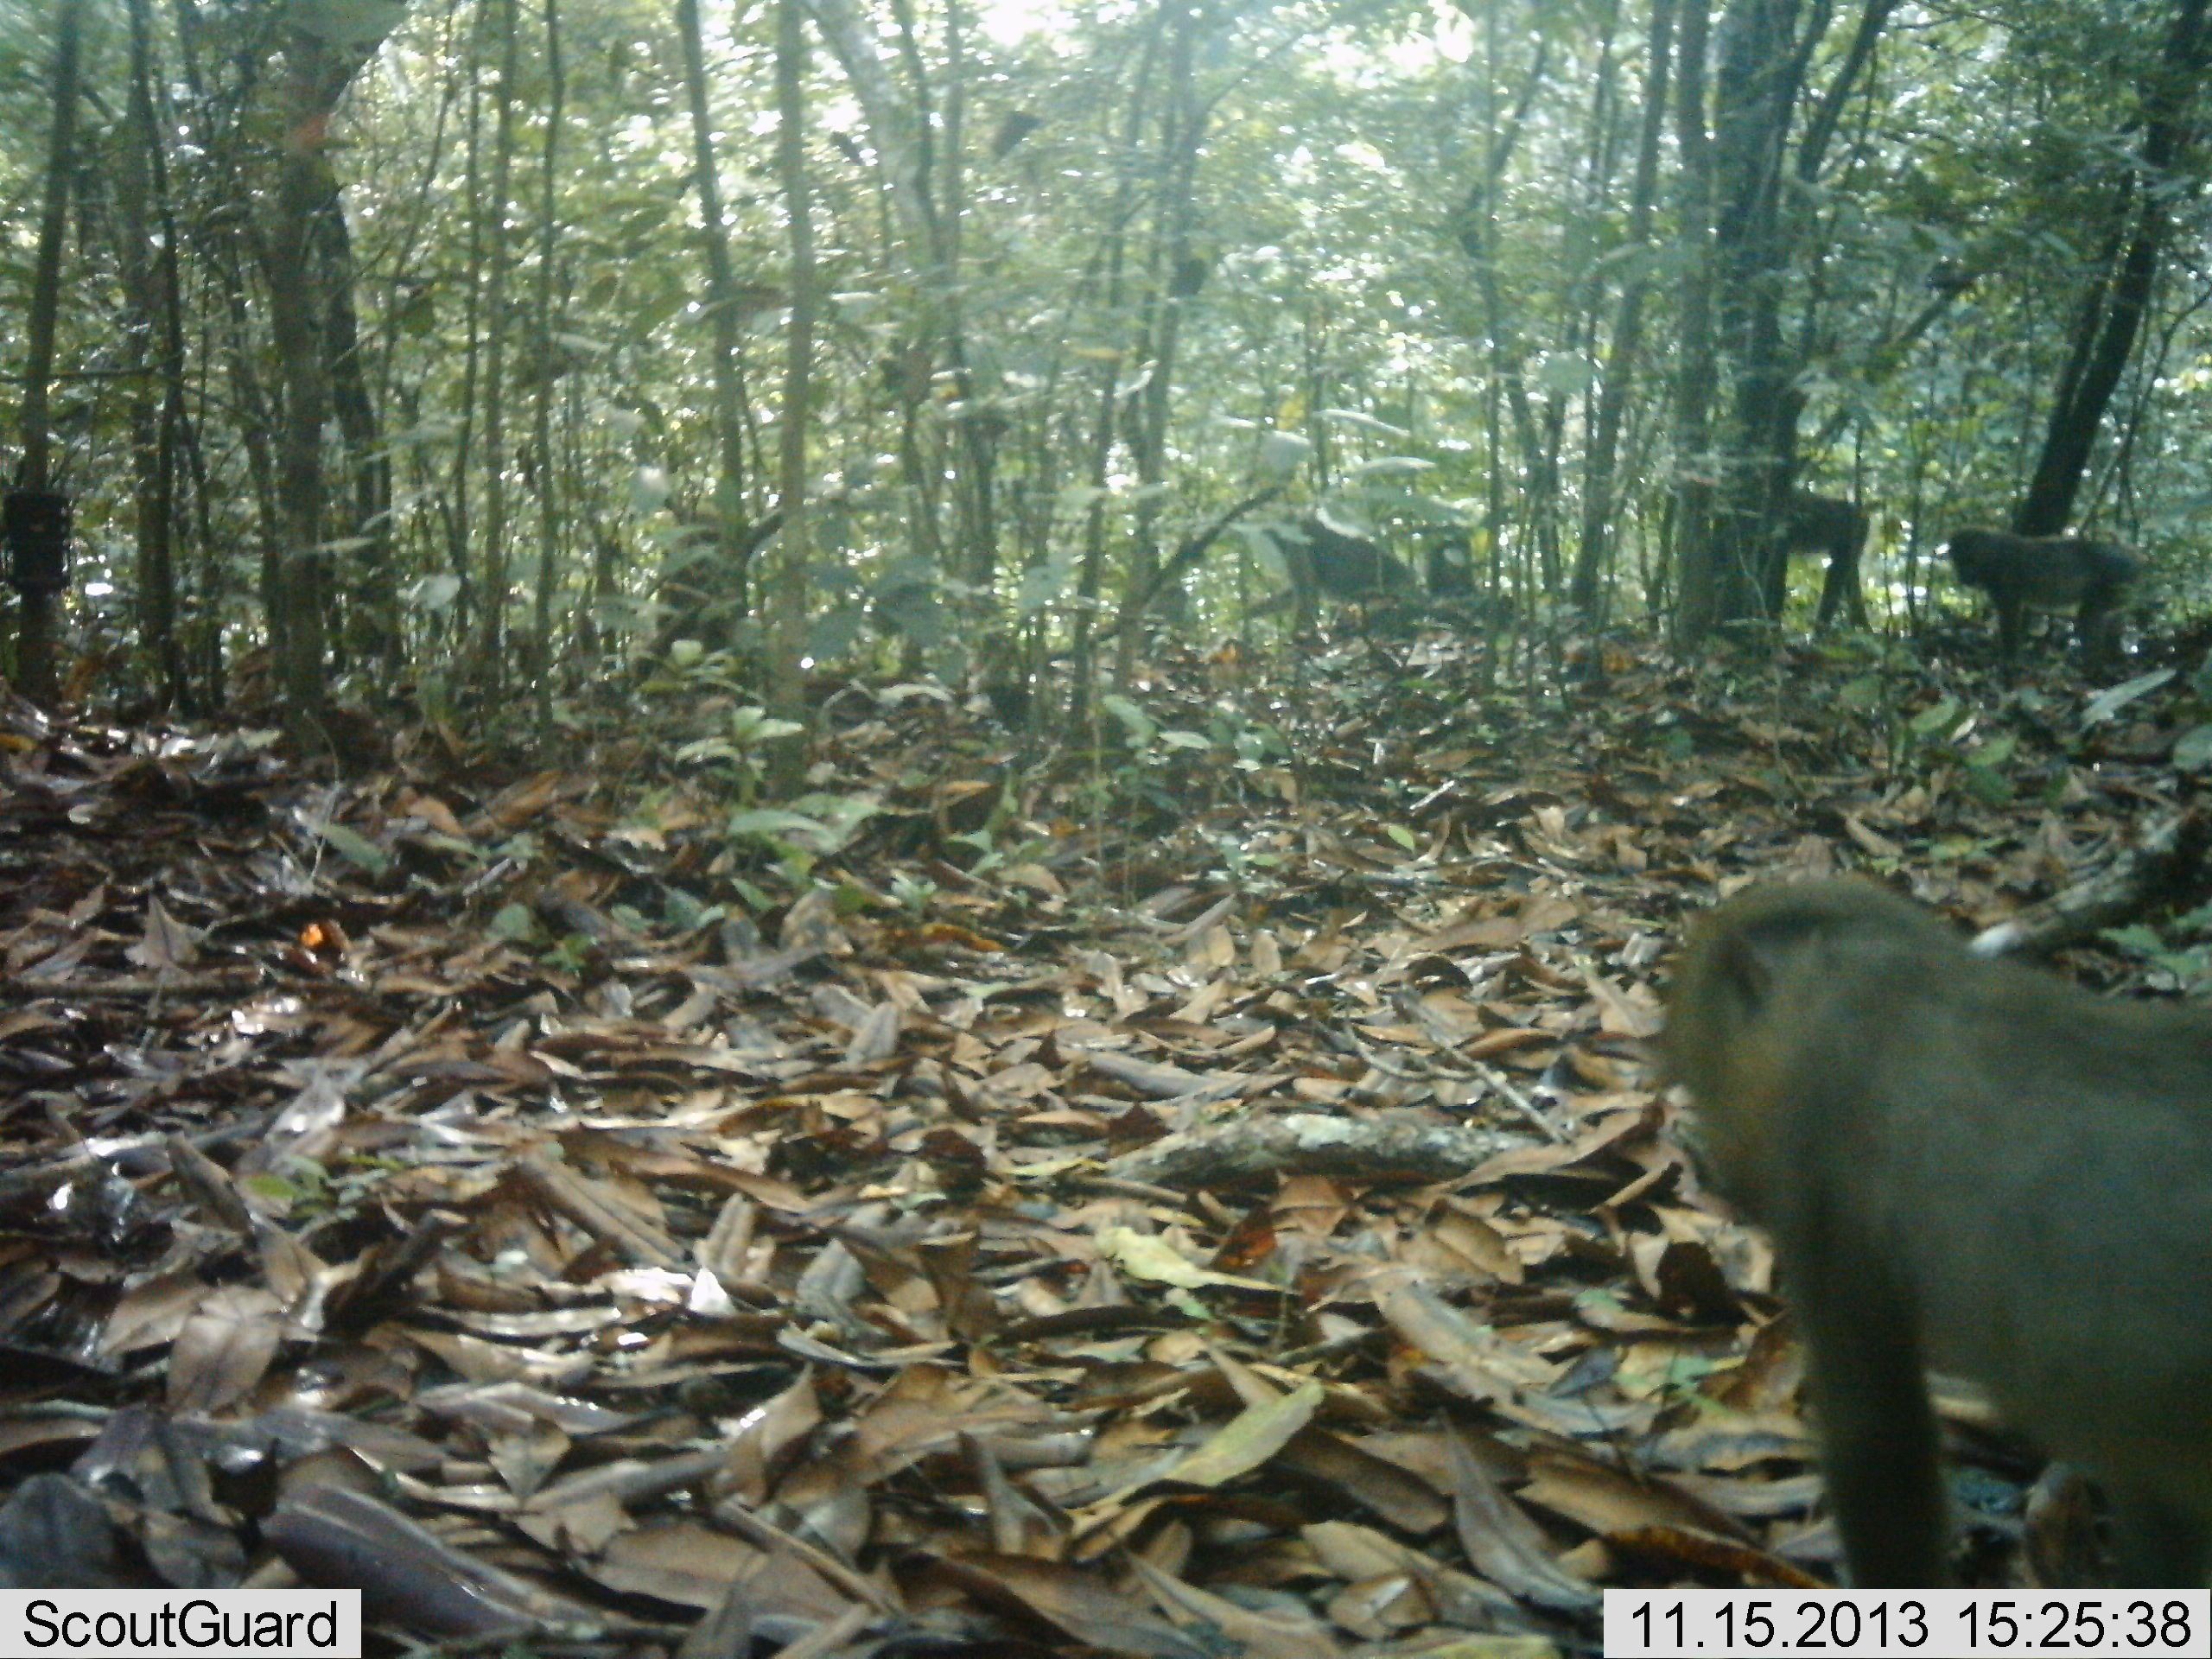

In [43]:
Image(random.choice(mandrillus_as_duiker_blue.img.tolist()))

## Monkey classified as Duiker Blue

In [45]:
monkey_as_duiker_blue = df_preds[(df_preds.label == "Monkey") & (df_preds.pred_1 == "Duiker_Blue")]
print(f"There are {len(monkey_as_duiker_blue)} monkey_as_duiker_blue")
monkey_as_duiker_blue.pred_2.value_counts()

There are 198 monkey_as_duiker_blue


Monkey                45
Blank                 40
Duiker_Red            31
Human                 23
Squirrel              13
Mandrillus            12
Guineafowl_Black      11
Mongoose               8
Elephant_African       5
Bird                   4
Chimpanzee             1
Civet_African_Palm     1
Rail_Nkulengu          1
Chevrotain_Water       1
Buffalo_African        1
Rat_Giant              1
Name: pred_2, dtype: int64

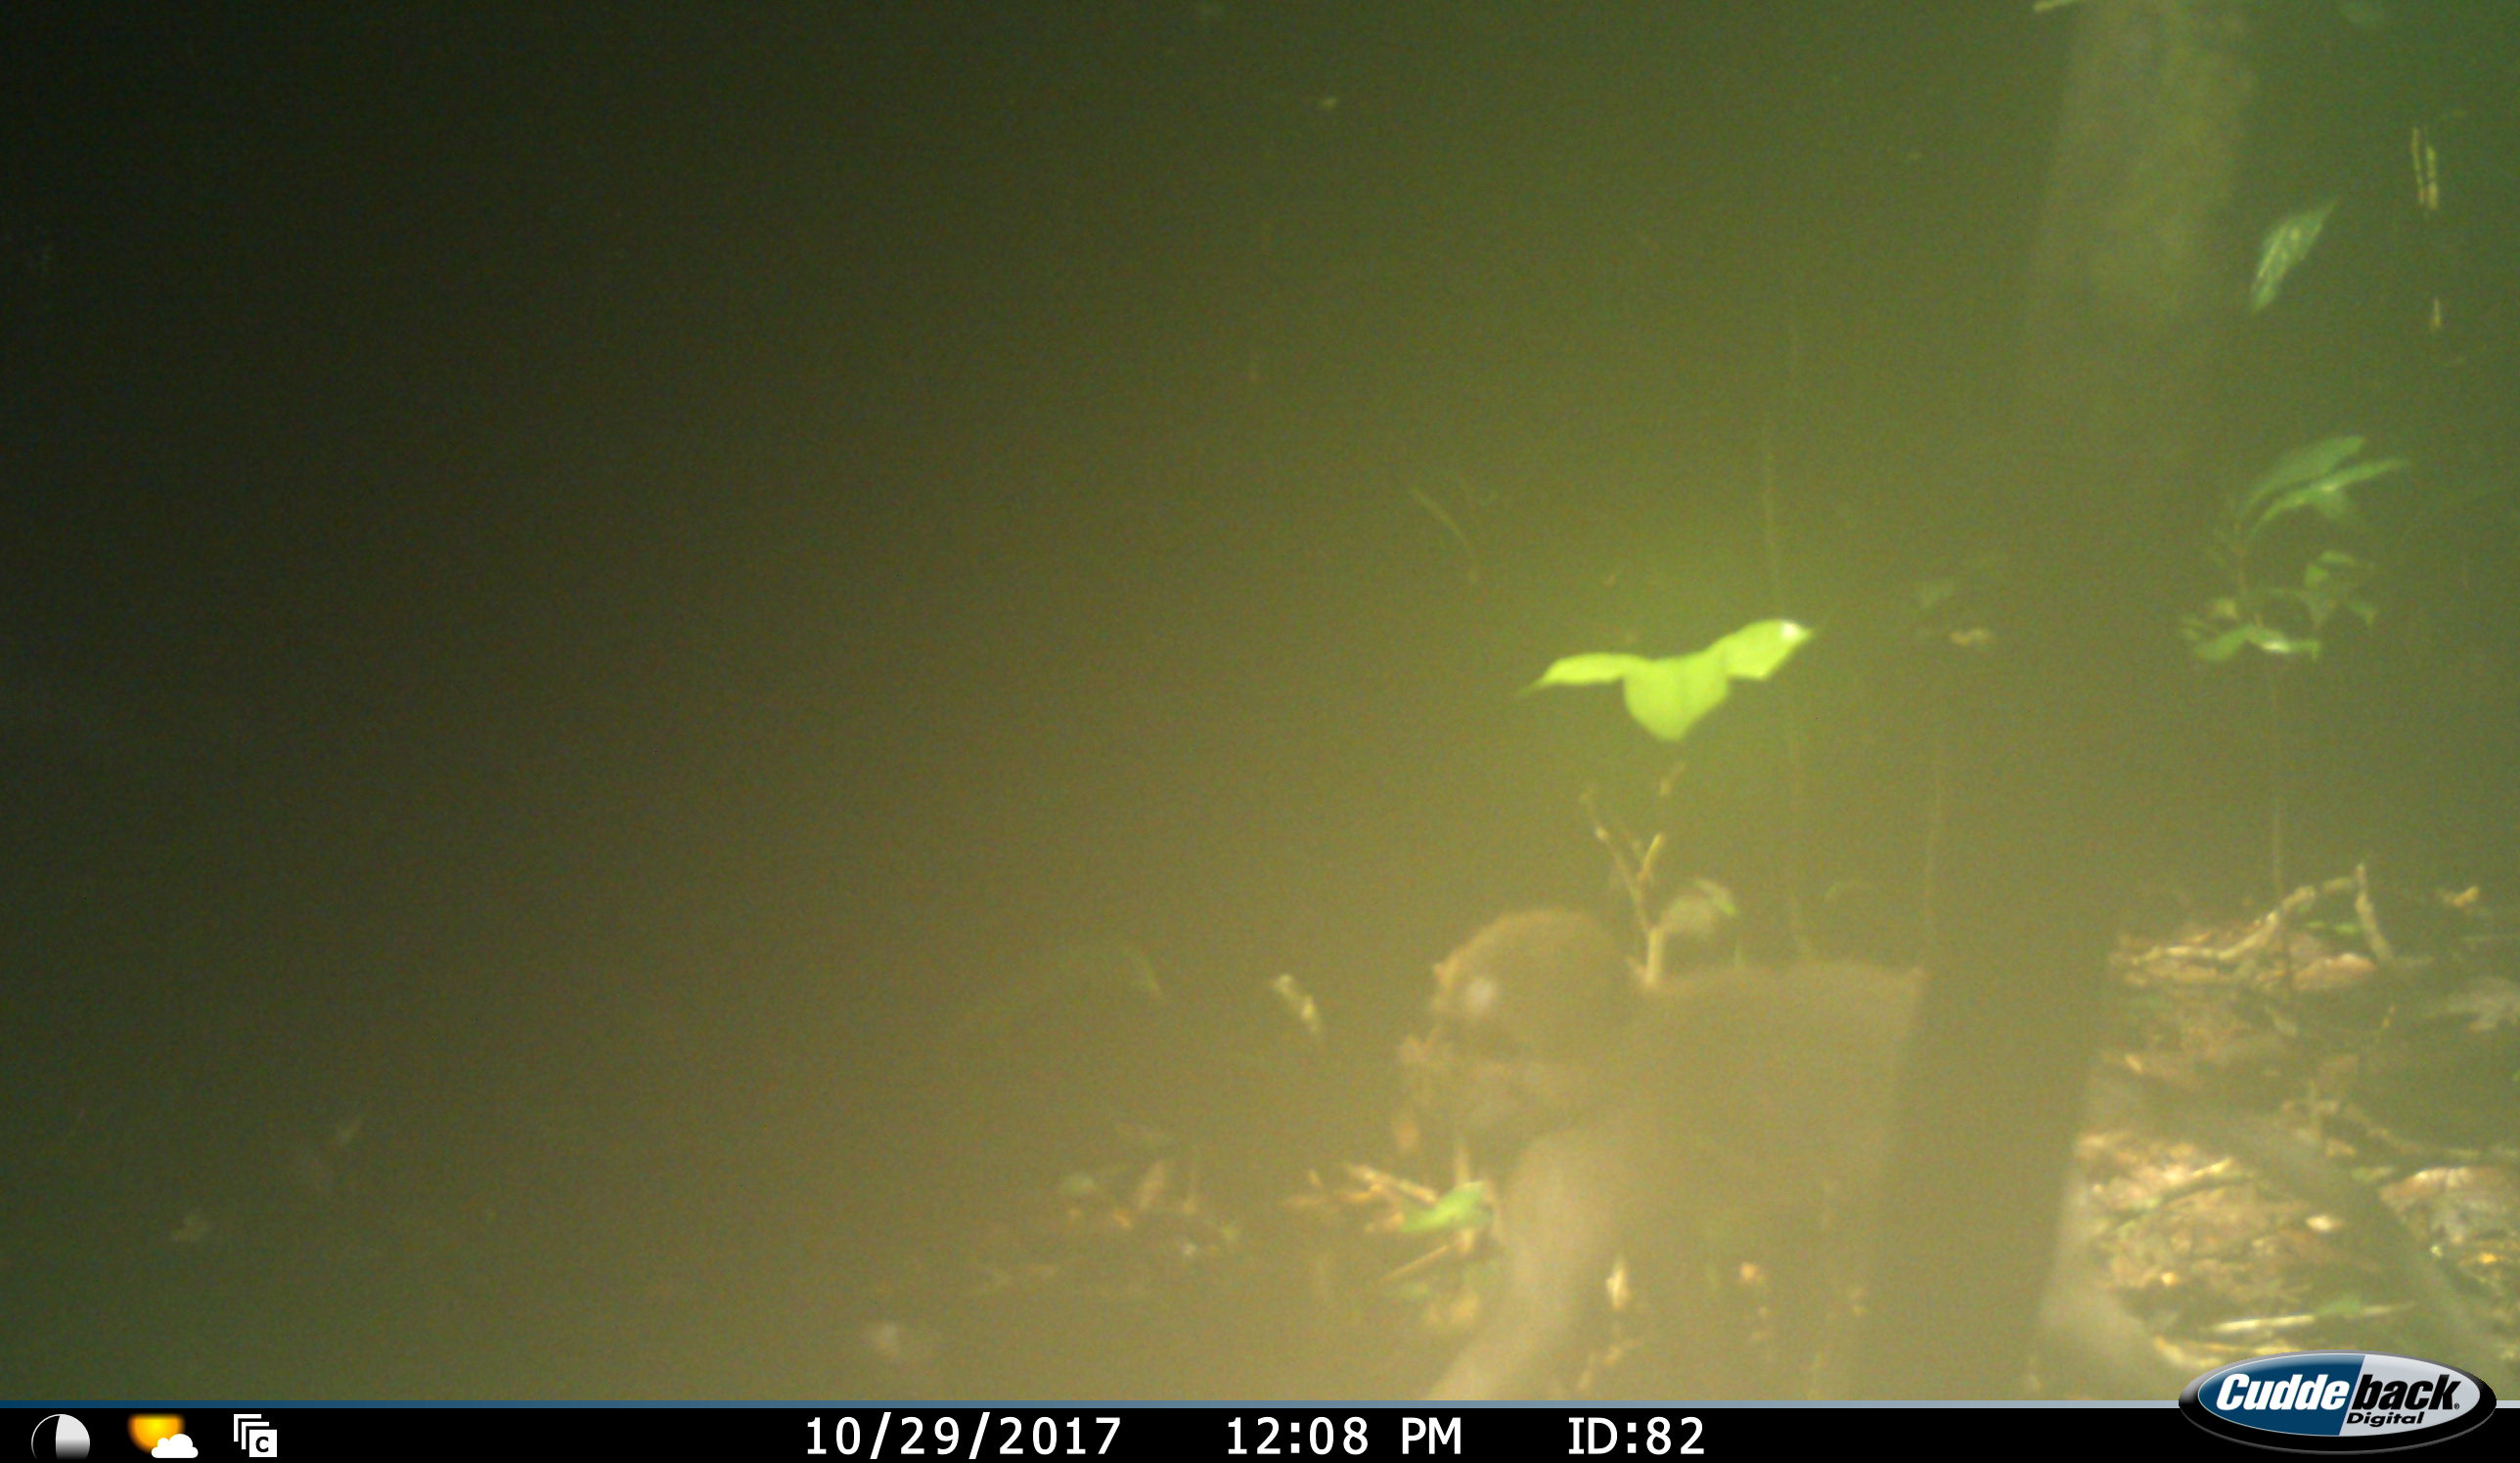

In [46]:
Image(random.choice(monkey_as_duiker_blue.img.tolist()))

# Accuracies per species

In [47]:
for animal in classes:
    df_animal = df_preds[df_preds.label == animal]
    count = len(df_animal)
    acc = round(100 * len(df_animal[df_animal.pred_1 == animal]) / count,2)
    top2_acc = round(100 * len(df_animal[(df_animal.pred_1 == animal) | (df_animal.pred_2 == animal)]) / count,2)
    top3_acc = round(100 * len(df_animal[(df_animal.pred_1 == animal) | (df_animal.pred_2 == animal) | (df_animal.pred_3 == animal)]) / count,2)
    print(f" {animal:22} has acc: {acc:<5}%, top2_acc: {top2_acc:<5}%, top3_acc: {top3_acc:<5}%, count in valid: {count}") 

 Bird                   has acc: 78.07%, top2_acc: 84.13%, top3_acc: 86.87%, count in valid: 693
 Blank                  has acc: 90.36%, top2_acc: 93.78%, top3_acc: 95.34%, count in valid: 5000
 Buffalo_African        has acc: 72.88%, top2_acc: 83.85%, top3_acc: 89.03%, count in valid: 483
 Cat_Golden             has acc: 40.0 %, top2_acc: 49.33%, top3_acc: 60.0 %, count in valid: 75
 Chevrotain_Water       has acc: 41.92%, top2_acc: 54.29%, top3_acc: 65.15%, count in valid: 396
 Chimpanzee             has acc: 65.74%, top2_acc: 78.31%, top3_acc: 83.61%, count in valid: 1074
 Civet_African_Palm     has acc: 54.1 %, top2_acc: 70.49%, top3_acc: 77.05%, count in valid: 61
 Duiker_Blue            has acc: 86.68%, top2_acc: 92.86%, top3_acc: 96.14%, count in valid: 5000
 Duiker_Red             has acc: 90.36%, top2_acc: 94.42%, top3_acc: 95.78%, count in valid: 5000
 Duiker_Yellow_Backed   has acc: 73.76%, top2_acc: 81.28%, top3_acc: 85.41%, count in valid: 1090
 Elephant_African       has

# Accuracies per source

In [48]:
meta_df_full = pd.read_csv(HOME_FOLDER_OF_REPO / "inspect_data_split_validation/train_valid_df.csv")
meta_df = meta_df_full[meta_df_full.is_valid == True]
meta_df.head()

,uniqueName,species,main_folder,is_valid,sub_folder
24,0000103.jpg,Blank,Compressed Camera Trap Images,True,T11
25,0000104.jpg,Human,Compressed Camera Trap Images,True,T11
26,0000105.jpg,Human,Compressed Camera Trap Images,True,T11
27,0000106.jpg,Human,Compressed Camera Trap Images,True,T11
28,0000108.jpg,Blank,Compressed Camera Trap Images,True,T28


#### join main_folder and sub_folder from meta_df based on uniqueName

In [49]:
df_preds = pd.merge(df_preds, meta_df[["uniqueName", "main_folder", "sub_folder"]], how="inner", on="uniqueName")

In [50]:
print(df_preds.shape)
df_preds.head()

(43628, 39)


,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,img,uniqueName,pred_1,pred_2,pred_3,score_1,score_2,score_3,main_folder,sub_folder
0,3.570265e-05,0.001445,2.180603e-04,9.789845e-06,1.021979e-05,1.123897e-05,1.040487e-05,4.403269e-04,4.605485e-05,5.058151e-05,...,/data/Gabon_trainingData/1039759.jpg,1039759.jpg,Human,Hog_Red_River,Blank,0.994561,0.001780,0.001445,Compressed Camera Trap Images,T18
1,3.359222e-06,0.000893,2.089690e-05,2.785994e-07,1.902536e-05,2.143928e-06,3.144651e-06,1.606906e-05,2.828091e-06,6.575648e-07,...,/data/Gabon_trainingData/1195784.jpg,1195784.jpg,Porcupine_Brush_Tailed,Blank,Rat_Giant,0.998434,0.000893,0.000210,allData,StephBrittainZSL
2,1.173622e-07,0.998352,8.825286e-07,1.125437e-07,7.130751e-07,3.140708e-07,1.095479e-07,3.303264e-07,7.548314e-07,1.651983e-07,...,/data/Gabon_trainingData/0880576.jpg,0880576.jpg,Blank,Human,Elephant_African,0.998352,0.001000,0.000634,Compressed Camera Trap Images,T11
3,1.604006e-03,0.850026,9.273610e-03,1.160529e-04,1.545879e-04,1.047468e-03,7.212290e-05,8.633371e-02,6.769311e-04,1.903582e-05,...,/data/Gabon_trainingData/1194852.jpg,1194852.jpg,Blank,Duiker_Blue,Elephant_African,0.850026,0.086334,0.031094,allData,StephBrittainZSL
4,3.992095e-04,0.000073,1.489591e-04,3.351047e-05,4.849581e-05,1.795067e-04,1.804623e-05,9.280165e-01,5.082623e-04,1.021940e-05,...,/data/Gabon_trainingData/1201480.jpg,1201480.jpg,Duiker_Blue,Monkey,Hog_Red_River,0.928016,0.060248,0.004929,allData,LailaBahaaelDinPanthera


In [51]:
sources = df_preds.main_folder.unique()
for source in sources:
    df_source = df_preds[df_preds.main_folder == source]
    count = len(df_source)
    acc = round(100 * len(df_source[df_source.pred_1 == df_source.label]) / count,2)
    top2_acc = round(100 * len(df_source[(df_source.pred_1 == df_source.label) | (df_source.pred_2 == df_source.label)]) / count,2)
    print(f"{source:30} has acc: {acc:<5}%, top2_acc: {top2_acc:<4}%, count in valid: {count:>6}") 

Compressed Camera Trap Images  has acc: 96.68%, top2_acc: 98.81%, count in valid:  13428
allData                        has acc: 71.29%, top2_acc: 83.58%, count in valid:  24328
Camera trap Nki National Park  has acc: 81.56%, top2_acc: 88.85%, count in valid:   5872


In [52]:
sources = meta_df.main_folder.unique()
for source in sources:
    df_source = df_preds[df_preds.main_folder == source]
    sub_sources = df_source.sub_folder.unique()
    print(f"\n{source}")
    for sub_source in sub_sources:
        df_sub_source = df_source[df_source.sub_folder == sub_source]
        count = len(df_sub_source)
        acc = round(100 * len(df_sub_source[df_sub_source.pred_1 == df_sub_source.label]) / count,2)
        top2_acc = round(100 * len(df_sub_source[(df_sub_source.pred_1 == df_sub_source.label) | (df_sub_source.pred_2 == df_sub_source.label)]) / count,2)
        print(f"  {sub_source:30} has acc: {acc:<5}%, top2_acc: {top2_acc:<5}%, count in valid: {count:>6}") 


Compressed Camera Trap Images
  T18                            has acc: 96.33%, top2_acc: 99.32%, count in valid:   1473
  T11                            has acc: 97.32%, top2_acc: 99.49%, count in valid:   2540
  T1                             has acc: 95.96%, top2_acc: 98.07%, count in valid:   5743
  T28                            has acc: 97.17%, top2_acc: 99.18%, count in valid:   3036
  T41                            has acc: 99.06%, top2_acc: 99.84%, count in valid:    636

Camera trap Nki National Park
  C06                            has acc: 77.71%, top2_acc: 86.09%, count in valid:   2387
  C16                            has acc: 84.95%, top2_acc: 91.76%, count in valid:   1395
  C01                            has acc: 86.53%, top2_acc: 92.6 %, count in valid:   1514
  C12                            has acc: 76.22%, top2_acc: 83.33%, count in valid:    576

allData
  StephBrittainZSL               has acc: 67.03%, top2_acc: 78.58%, count in valid:   7770
  LailaBahaaelDinPa

In [53]:
df_preds[df_preds.sub_folder == "T41"].label.value_counts()

Blank               490
Hog_Red_River        95
Human                27
Elephant_African     22
Buffalo_African       1
Leopard_African       1
Name: label, dtype: int64

In [54]:
df_preds[df_preds.sub_folder == "T41"].pred_1.value_counts()

Blank               489
Hog_Red_River        95
Human                26
Elephant_African     22
Buffalo_African       3
Leopard_African       1
Name: pred_1, dtype: int64

Impressive!

## StephBrittainZSL

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [83]:
def plot_confusion_matrix_from_lists(y_true, y_pred, classes, for_model=None, save_as=None):
    conf_m = confusion_matrix(y_true, y_pred)
    df_conf_m = pd.DataFrame(conf_m, index=classes, columns=classes)

    plt.figure(figsize = (12,12))
    ax = sns.heatmap(df_conf_m, annot=True, cmap=sns.color_palette("Blues", n_colors=100), cbar=False, fmt="d")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    plt.title("Confusion matrix")
    if for_model:
        plt.title(f"Confusion matrix for model {for_model}")
    
    plt.tight_layout()
        
    if save_as:
        plt.savefig(save_as)

In [100]:
y_true = df_preds[df_preds.sub_folder == "StephBrittainZSL"].label
y_pred = df_preds[df_preds.sub_folder == "StephBrittainZSL"].pred_1
clses = sorted(list(set(list(y_true) + list(y_pred))))

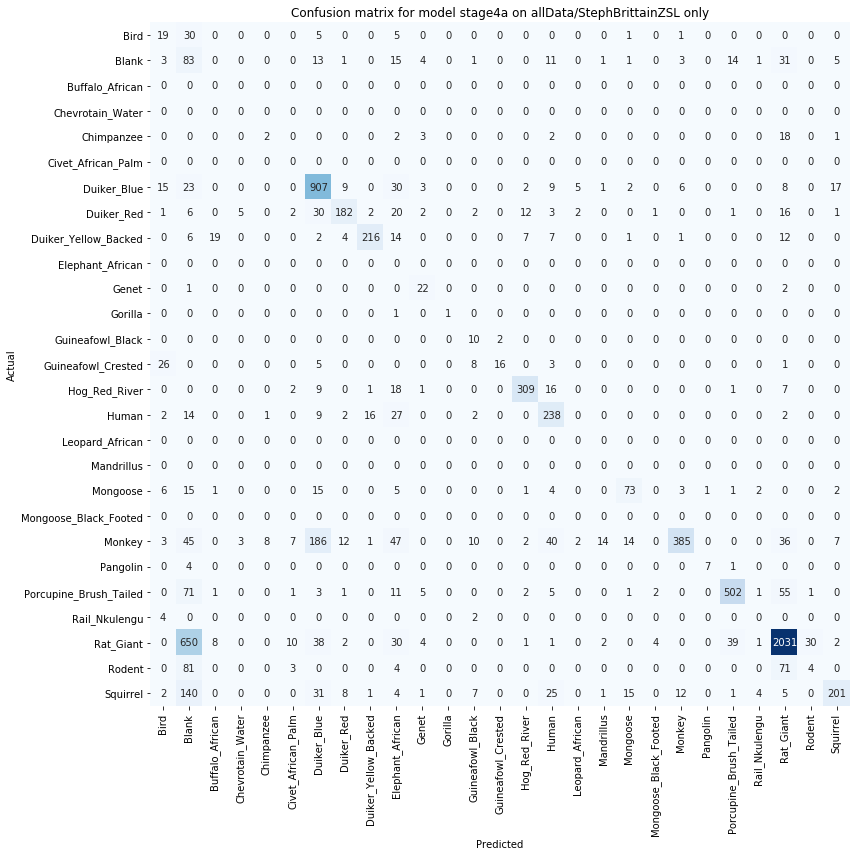

In [101]:
plot_confusion_matrix_from_lists(y_true,
                                 y_pred, 
                                 clses,
                                 for_model="stage4a on allData/StephBrittainZSL only",
                                 save_as="conf_m_stage4a_allData-StephBrittainZSL")

In [102]:
y_true = df_preds[df_preds.sub_folder == "LailaBahaaelDinPanthera"].label
y_pred = df_preds[df_preds.sub_folder == "LailaBahaaelDinPanthera"].pred_1
clses = sorted(list(set(list(y_true) + list(y_pred))))
len(clses)

28

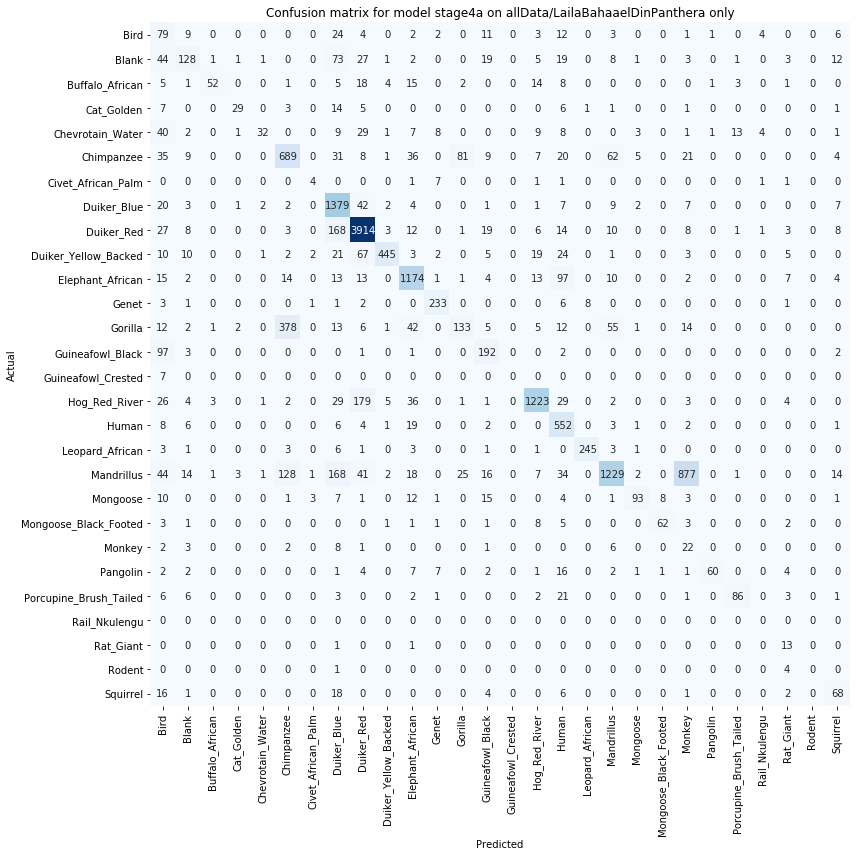

In [103]:
plot_confusion_matrix_from_lists(y_true,
                                 y_pred, 
                                 clses,
                                 for_model="stage4a on allData/LailaBahaaelDinPanthera only",
                                 save_as="conf_m_stage4a_allData-LailaBahaaelDinPanthera")